In [1]:
#dependecies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

#initialize dataframe
file_path = os.path.join('csv_files/cleaned_county_vs_crash_count')
df = pd.read_csv(file_path)

#remove unnamed column 
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,CountyName,StateName,CrashCount,Population
0,ABBEVILLE COUNTY,South Carolina,1,24527.0
1,ACCOMACK COUNTY,Virginia,5,32316.0
2,ADA COUNTY,Idaho,21,481587.0
3,ADAIR COUNTY,Oklahoma,11,22194.0
4,ADAMS COUNTY,Wisconsin,106,20220.0


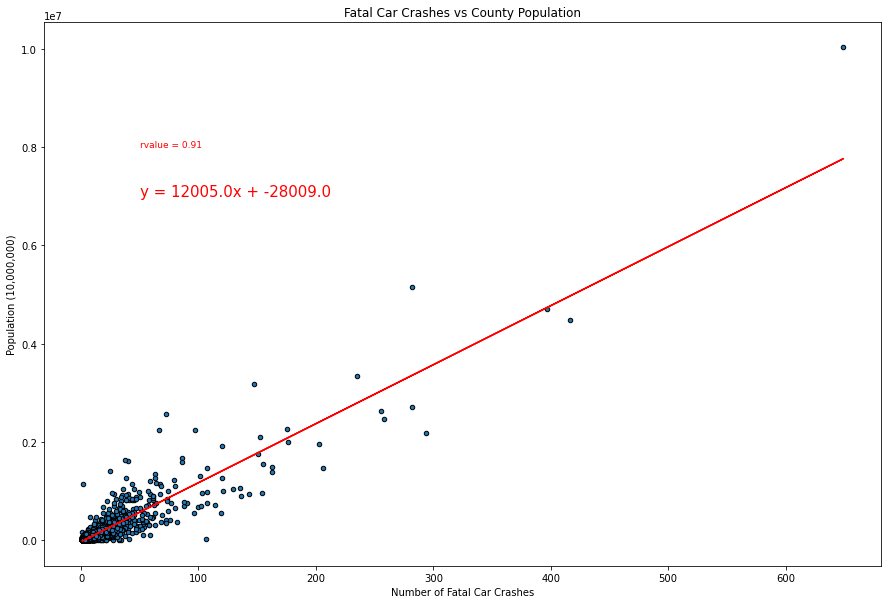

In [2]:
df.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'Fatal Car Crashes vs County Population',
        edgecolor='black' ,
        figsize = (15, 10)
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df.CrashCount, df.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * df.CrashCount + intercept

plt.annotate(line_eq, (50, 7000000), fontsize = 15, color='r')
plt.annotate(r_statement, (50, 8000000), fontsize = 9, color='r')
plt.plot(df.CrashCount, regress_values, color='r')

plt.ylabel('Population (10,000,000)')
plt.xlabel('Number of Fatal Car Crashes')

plt.savefig('figures/PopVsCrashTotal.png', format = 'png')

plt.show()

In [3]:
#function to find outliers 
def findOutliers(series):
    quartiles = series.quantile([.25,.50,.75])
    IQR = quartiles[.75] - quartiles[.25]
    upper_bound = quartiles[.75] + 1.5 * IQR
    lower_bound = quartiles[.25] - 1.5 * IQR
    
    print(f'The outliers are outside these bounds: ({lower_bound}, {upper_bound})')
    
    outlier_data = []
    for data in series:
        if((data > upper_bound) | (data < lower_bound)):
            outlier_data.append(data)
    return outlier_data

In [4]:
#grab population outliers
pop_outliers = findOutliers(df.Population)

The outliers are outside these bounds: (-85198.0, 177514.0)


In [5]:
#grab crash count outliers
crash_outliers = findOutliers(df.CrashCount)

The outliers are outside these bounds: (-9.0, 23.0)


In [6]:
print(len(pop_outliers), len(crash_outliers))
print(df.shape[0])

349 288
2645


In [7]:
#remove all outliers
no_outliers_df = df
for pop in pop_outliers:
    no_outliers_df = no_outliers_df[no_outliers_df.Population != pop]
for crash in crash_outliers:
    no_outliers_df = no_outliers_df[no_outliers_df.CrashCount != crash]
print(f'{df.shape[0] - no_outliers_df.shape[0]} outliers removed.')

398 outliers removed.


With that amount of data removed, very likely to have new outliers.
Checking new scatter for now.

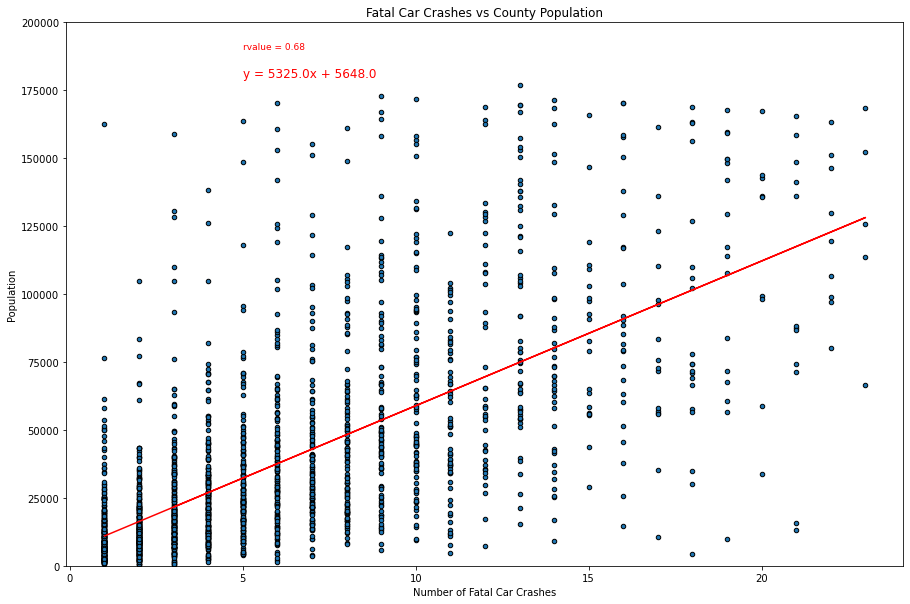

In [8]:
no_outliers_df.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'Fatal Car Crashes vs County Population',
        edgecolor='black',
        figsize = (15,10)
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(no_outliers_df.CrashCount, no_outliers_df.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * no_outliers_df.CrashCount + intercept

plt.annotate(line_eq, (5, 180000), fontsize = 12, color='r')
plt.annotate(r_statement, (5, 190000), fontsize = 9, color='r')
plt.plot(no_outliers_df.CrashCount, regress_values, color='r')

plt.ylim(0,200000)
plt.ylabel('Population')
plt.xlabel('Number of Fatal Car Crashes')

plt.savefig('figures/PopVsCrashNoOutliers.png', format = 'png')

plt.show()

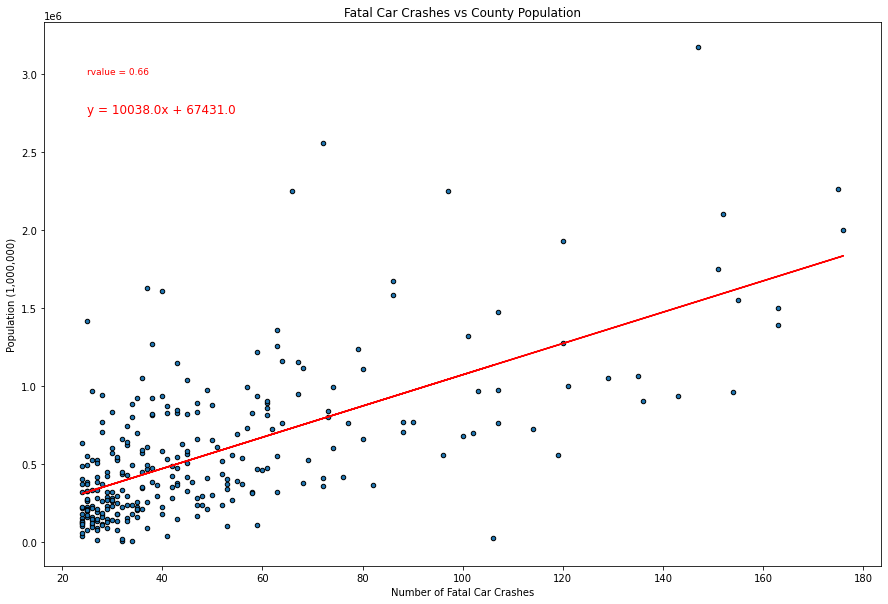

In [9]:
#I want to take a look at data > 23 since that is a very low number of crashes
#277 of the 398 outliers are contained in this dataframe

crashes = df[(df.CrashCount > 23) & (df.CrashCount < 200)]
crashes.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'Fatal Car Crashes vs County Population',
        edgecolor='black', 
        figsize = (15, 10)
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(crashes.CrashCount, crashes.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * crashes.CrashCount + intercept

plt.annotate(line_eq, (25, 2750000), fontsize = 12, color='r')
plt.annotate(r_statement, (25, 3000000), fontsize = 9, color='r')
plt.plot(crashes.CrashCount, regress_values, color='r')

plt.ylabel('Population (1,000,000)')
plt.xlabel('Number of Fatal Car Crashes')

plt.savefig('figures/PopVsCrash20to200.png', format = 'png')

plt.show()

In [10]:
crashes.shape[0]

277

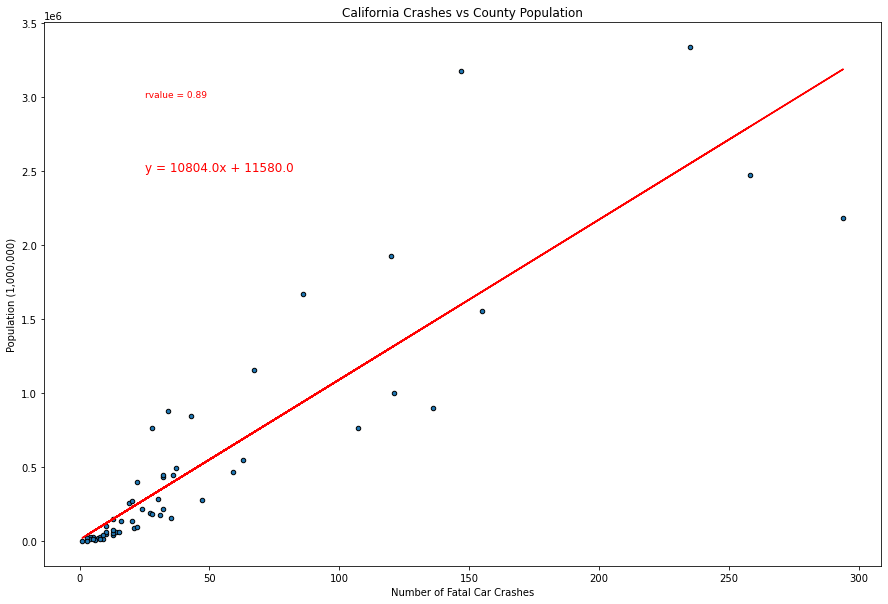

In [14]:
state_name = 'California'
state_df = df[df.StateName == state_name]

#california specific, removing Los Angeles
state_df = state_df[state_df.Population < 5000000]

state_df.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'California Crashes vs County Population',
        edgecolor='black', 
        figsize = (15, 10)
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(state_df.CrashCount, state_df.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * state_df.CrashCount + intercept

plt.annotate(line_eq, (25, 2500000), fontsize = 12, color='r')
plt.annotate(r_statement, (25, 3000000), fontsize = 9, color='r')
plt.plot(state_df.CrashCount, regress_values, color='r')

plt.ylabel('Population (1,000,000)')
plt.xlabel('Number of Fatal Car Crashes')

plt.savefig('figures/PopVsCrashCalifornia.png', format = 'png')

plt.show()

In [19]:
df['PerCapita'] = df.CrashCount / df.Population * 100000
df

,CountyName,StateName,CrashCount,Population,PerCapita
0,ABBEVILLE COUNTY,South Carolina,1,24527.0,4.077139
1,ACCOMACK COUNTY,Virginia,5,32316.0,15.472212
2,ADA COUNTY,Idaho,21,481587.0,4.360583
3,ADAIR COUNTY,Oklahoma,11,22194.0,49.562945
4,ADAMS COUNTY,Wisconsin,106,20220.0,524.233432
...,...,...,...,...,...
2640,YOUNG COUNTY,Texas,3,18010.0,16.657413
2641,YUBA COUNTY,California,13,78668.0,16.525144
2642,YUMA COUNTY,Colorado,2,10019.0,19.962072
2643,YUMA COUNTY,Arizona,26,213787.0,12.161638


In [22]:
df.sort_values('PerCapita', ascending = False).head()

,CountyName,StateName,CrashCount,Population,PerCapita
1408,LOVING COUNTY,Texas,2,169.0,1183.431953
1123,JACKSON COUNTY,South Dakota,32,3344.0,956.937799
1211,KENEDY COUNTY,Texas,3,404.0,742.574257
718,ESSEX COUNTY,Vermont,34,6163.0,551.679377
4,ADAMS COUNTY,Wisconsin,106,20220.0,524.233432


In [23]:
df.sort_values('PerCapita').head()

,CountyName,StateName,CrashCount,Population,PerCapita
724,FAIRFAX COUNTY,Virginia,2,1147532.0,0.174287
345,CENTRE COUNTY,Pennsylvania,1,162385.0,0.615820
1131,JAMES CITY COUNTY,Virginia,1,76523.0,1.306797
1021,HERKIMER COUNTY,New York,1,61319.0,1.630816
2024,RICHMOND COUNTY,New York,8,476143.0,1.680168
